# CIFAR-10 Dataset

Importing necessary Libraries

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#To ignore Warnings

import warnings             
warnings.filterwarnings('ignore')

In [82]:
# Function to unpickle data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [ ]:
# Load data from batch 5

data_batch5 = unpickle('data_batch_5')

In [38]:
type(data_batch5)   #checking datatype of file

dict

In [39]:
len(data_batch5)   #checking length of data_batch5

4

In [40]:
data_batch5[b'data'].shape    #Check the shape of the image data

(10000, 3072)

In [41]:
data_batch5[b'data'][0]      

array([255, 252, 253, ..., 173, 231, 248], dtype=uint8)

In [43]:
image=data_batch5[b'data'][0]      #Extract and reshape the image data
image=image.reshape(3,32,32)
image

array([[[255, 252, 253, ..., 165, 243, 254],
        [255, 252, 254, ..., 130, 225, 253],
        [255, 254, 248, ..., 141, 220, 253],
        ...,
        [233, 216, 241, ...,   9,  18, 169],
        [255, 255, 253, ...,  21, 113, 235],
        [255, 251, 253, ..., 172, 230, 247]],

       [[255, 252, 252, ..., 177, 246, 253],
        [255, 252, 254, ..., 144, 232, 255],
        [255, 254, 247, ..., 155, 227, 255],
        ...,
        [234, 216, 241, ...,  11,  19, 171],
        [255, 255, 253, ...,  23, 115, 237],
        [255, 251, 253, ..., 174, 232, 248]],

       [[254, 252, 254, ..., 184, 247, 252],
        [254, 252, 255, ..., 161, 239, 255],
        [255, 254, 249, ..., 175, 235, 255],
        ...,
        [234, 216, 241, ...,  11,  19, 170],
        [255, 255, 253, ...,  22, 114, 236],
        [255, 251, 253, ..., 173, 231, 248]]], dtype=uint8)

In [86]:
# Reshape the entire dataset and transpose dimensions

data=data_batch5[b'data']
labels = data_batch5[b'labels']
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)

#Display the Shape of the reshaped data

print(data.shape)    


(10000, 32, 32, 3)


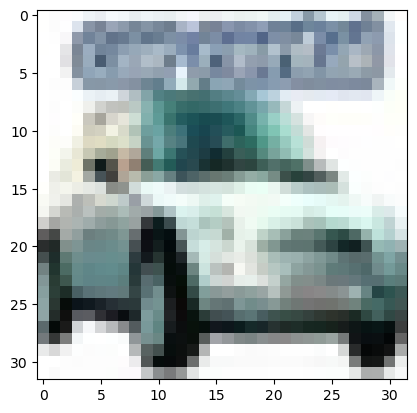

In [88]:
plt.imshow(data[0])  # Display the first image

In [77]:
batch_no=5

In [45]:
data_list=[]

In [89]:
# Create a list for data in the desired format for a DataFrame

for i in range(len(data)):
    d1=data[i].flatten()
    labels = data_batch5[b'labels']
    
    label= labels[i] #Extract the label (assuming it's a 1D array)
    
    data_list.append([label]+list(d1))
    

In [91]:
labels = data_batch5[b'labels']   # Creating a list of labels
#print(labels)

In [98]:
# Define column names for the DataFrame

column1=['label']+[f'Pixel_{i}' for i in range(len(data_list[0])-1)]

In [99]:
df=pd.DataFrame(data_list,columns=column1)   # Create a DataFrame

In [100]:
df.shape      #Shape of the DataFrame

(20000, 3073)

In [101]:
# Save the DataFrame to a CSV file

csv_filename = f'cifar10_batch_{batch_no}.csv'
df.to_csv("Batch_5", index=False)

In [102]:
df.head(5)   #Display the shape and the first 5 rows of the DataFrame

,label,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,1,-1,-1,-2,-4,-4,-4,-3,-4,-2,...,-84,-84,-82,-83,-26,-24,-25,-9,-8,-8
1,8,127,-111,-89,126,-112,-90,127,-111,-89,...,89,72,90,102,78,96,108,82,100,112
2,5,116,71,26,64,34,10,19,6,2,...,8,44,25,7,41,22,6,38,19,5
3,1,-51,-51,-55,-43,-45,-47,-21,-23,-27,...,23,18,20,24,19,22,25,18,20,23
4,5,-67,-82,120,-72,-86,-125,-75,-90,-114,...,72,82,100,76,84,101,77,81,94,72


In [94]:
df.ndim    #Check dimensionality of data frame

2